In [48]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Hyperparameter
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter

data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [50]:
from sklearn.model_selection import train_test_split
x,y = data.drop('target' , axis = 1), data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.4 ,random_state= 9)

SCALE-INSENSİTİVE

* Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=9)
forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


* Gradient Boosting Classifier




In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


* Naive Bayes


In [53]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


ACCURACY


In [54]:
forest.score(x_test, y_test)

0.9853658536585366

In [55]:
gb_clf.score(x_test, y_test)

0.9707317073170731

In [56]:
nb_clf.score(x_test, y_test)

0.8463414634146341

In [57]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Gradient Boost','Naive Bayes'],
                         'Accuracy': [forest.score(x_test, y_test)*100, gb_clf.score(x_test, y_test)*100,nb_clf.score(x_test, y_test)*100]})
model_ev

,Model,Accuracy
0,Random Forest,98.536585
1,Gradient Boost,97.073171
2,Naive Bayes,84.634146


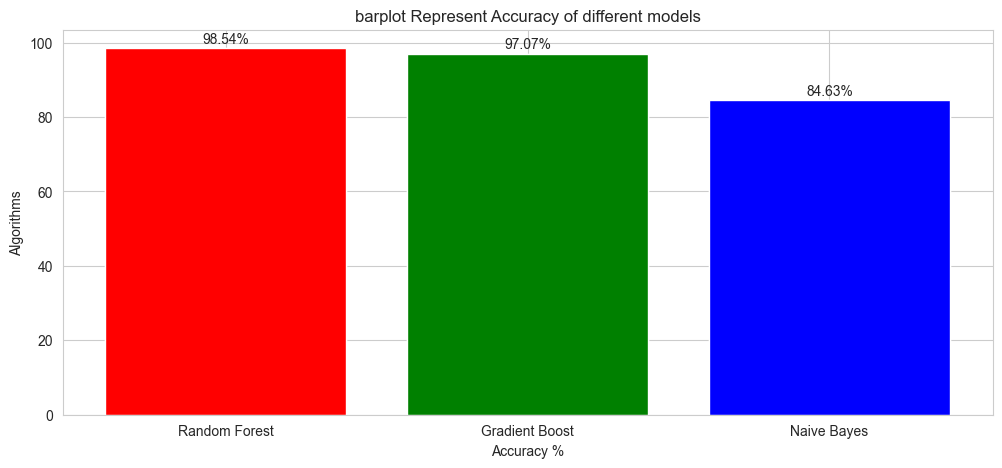

In [58]:
colors = ['red','green','blue']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)

bars = plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()

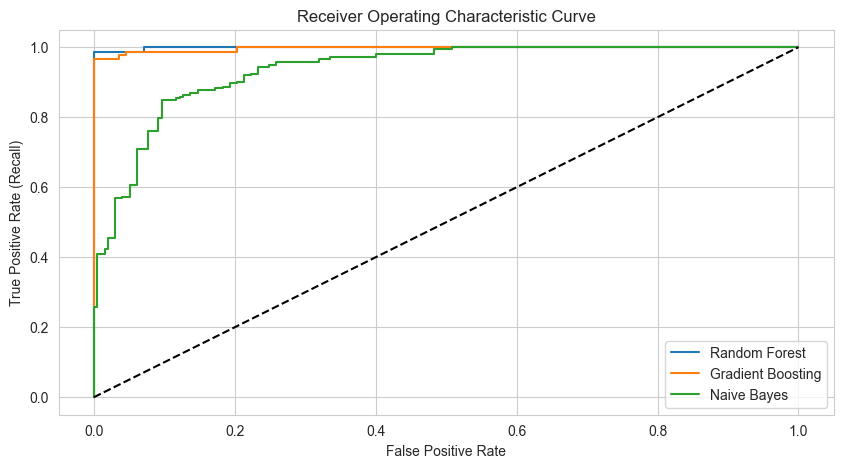

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# Tahmin olasılıkları (pozitif sınıf için)
rf_probs = forest.predict_proba(x_test)[:,1]
gb_probs = gb_clf.predict_proba(x_test)[:,1]
nb_probs = nb_clf.predict_proba(x_test)[:,1]

# ROC curve hesapla
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(y_test, rf_probs)
gb_false_positive_rate, gb_true_positive_rate, gb_threshold = roc_curve(y_test, gb_probs)
nb_false_positive_rate, nb_true_positive_rate, nb_threshold = roc_curve(y_test, nb_probs)

# Çizim
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(gb_false_positive_rate, gb_true_positive_rate, label='Gradient Boosting')
plt.plot(nb_false_positive_rate, nb_true_positive_rate, label='Naive Bayes')

# Referans çizgileri
plt.plot([0,1],[0,1],'k--')

plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [60]:
roc_auc_score(y_test,rf_probs)
#roc_auc_score(y_test,gb_probs)
#roc_auc_score(y_test,nb_probs)

0.9989990705655251

HYPERPARAMETER TUNING

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1 ,2 ,4],
    'max_features': ['sqrt' ,'log2', None] }
forest = RandomForestClassifier(n_jobs=-1 ,random_state=9)
grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [62]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


,estimator,RandomForestC...andom_state=9)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [63]:
best_forest = grid_search.best_estimator_

In [64]:
best_forest

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


FEATURE IMPORTANCES

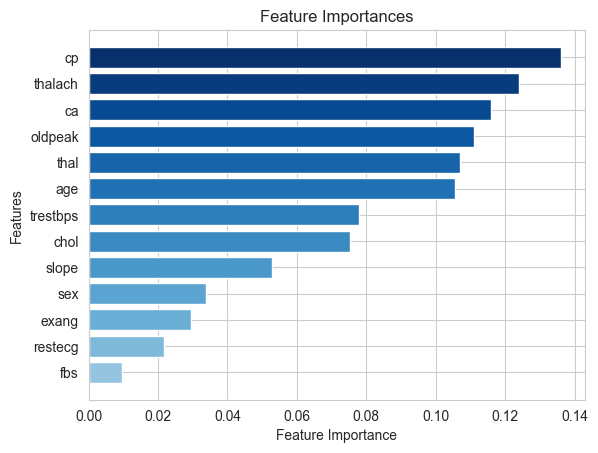

In [90]:
feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.Blues(np.linspace(0.3,1,len(sorted_features)))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')

plt.show()

<Axes: >

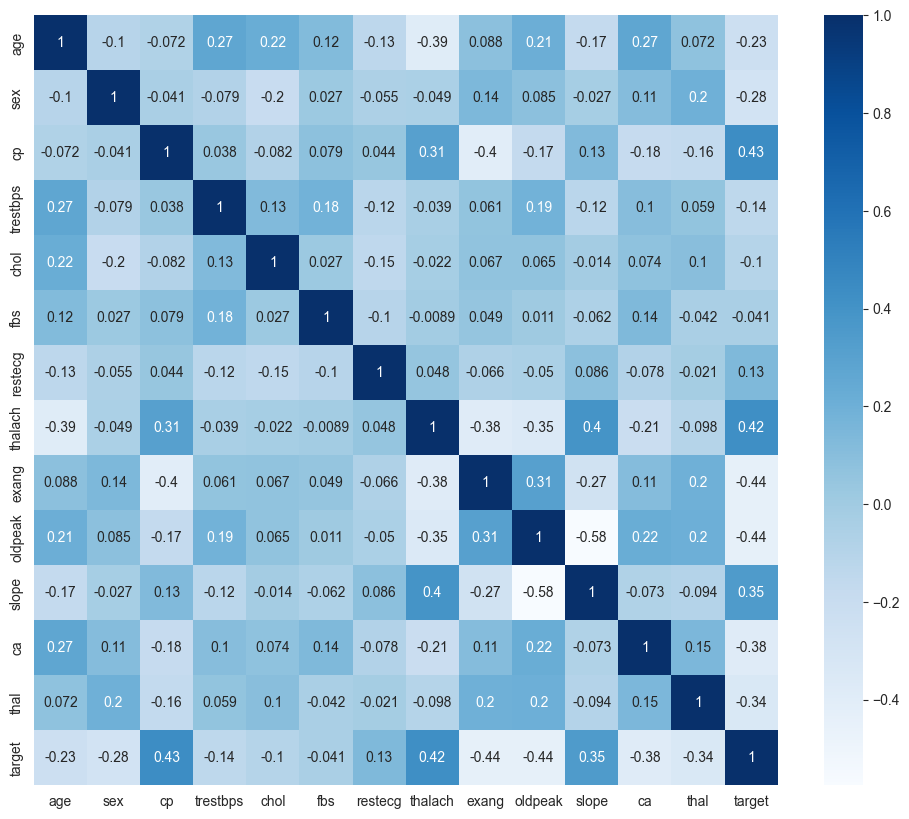

In [92]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')